In [98]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("data/dataset.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

/var/folders/d5/dh7kqgrn5q39ckybj7trftbr0000gn/T/ipykernel_4928/1528018510.py:1: DtypeWarning: Columns (9,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/dataset.csv")


,SessionID,Start,End,kWh,Revenue,City,PortNum,PortType,Adapter,Client,Tariff,MaxPower,Fishka,Successful,DisconnectionReason,Latitude,Longitude,Type_SLOW,Type_ULTRAFAST,ChargingTime
0,591686,2021-01-01 00:05:34,2021-01-01 00:31:22,6.033,27.15,Київ,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,0,0,25.80
1,591720,2021-01-01 01:40:37,2021-01-01 01:42:19,0.890,6.22,Київ,1,CHAdeMO,False,550843379,6.99,NaN,True,True,NaN,50.48207,30.48725,0,0,1.70
2,591749,2021-01-01 02:12:35,2021-01-01 03:07:36,3.300,14.85,Стрый,1,Type 2,False,540085134,4.50,NaN,True,True,NaN,49.24778,23.85610,1,0,55.02
3,591755,2021-01-01 02:32:21,2021-01-01 02:57:08,6.880,48.09,Київ,1,CHAdeMO,False,828881697,6.99,NaN,True,True,NaN,50.48207,30.48725,0,0,24.78
4,591783,2021-01-01 03:39:03,2021-01-01 04:02:05,12.630,56.84,Київ,3,Type 2 Plug,False,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,0,0,23.03


# EDA

In [100]:
print(df['kWh'].describe())

count    372187.000000
mean          8.171009
std          14.269730
min           0.000000
25%           0.000000
50%           0.000000
75%          10.820000
max         111.708000
Name: kWh, dtype: float64


/var/folders/d5/dh7kqgrn5q39ckybj7trftbr0000gn/T/ipykernel_4928/3287599093.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_for_pie = top_4_counts.append(pd.Series({'Інше': other_count}))


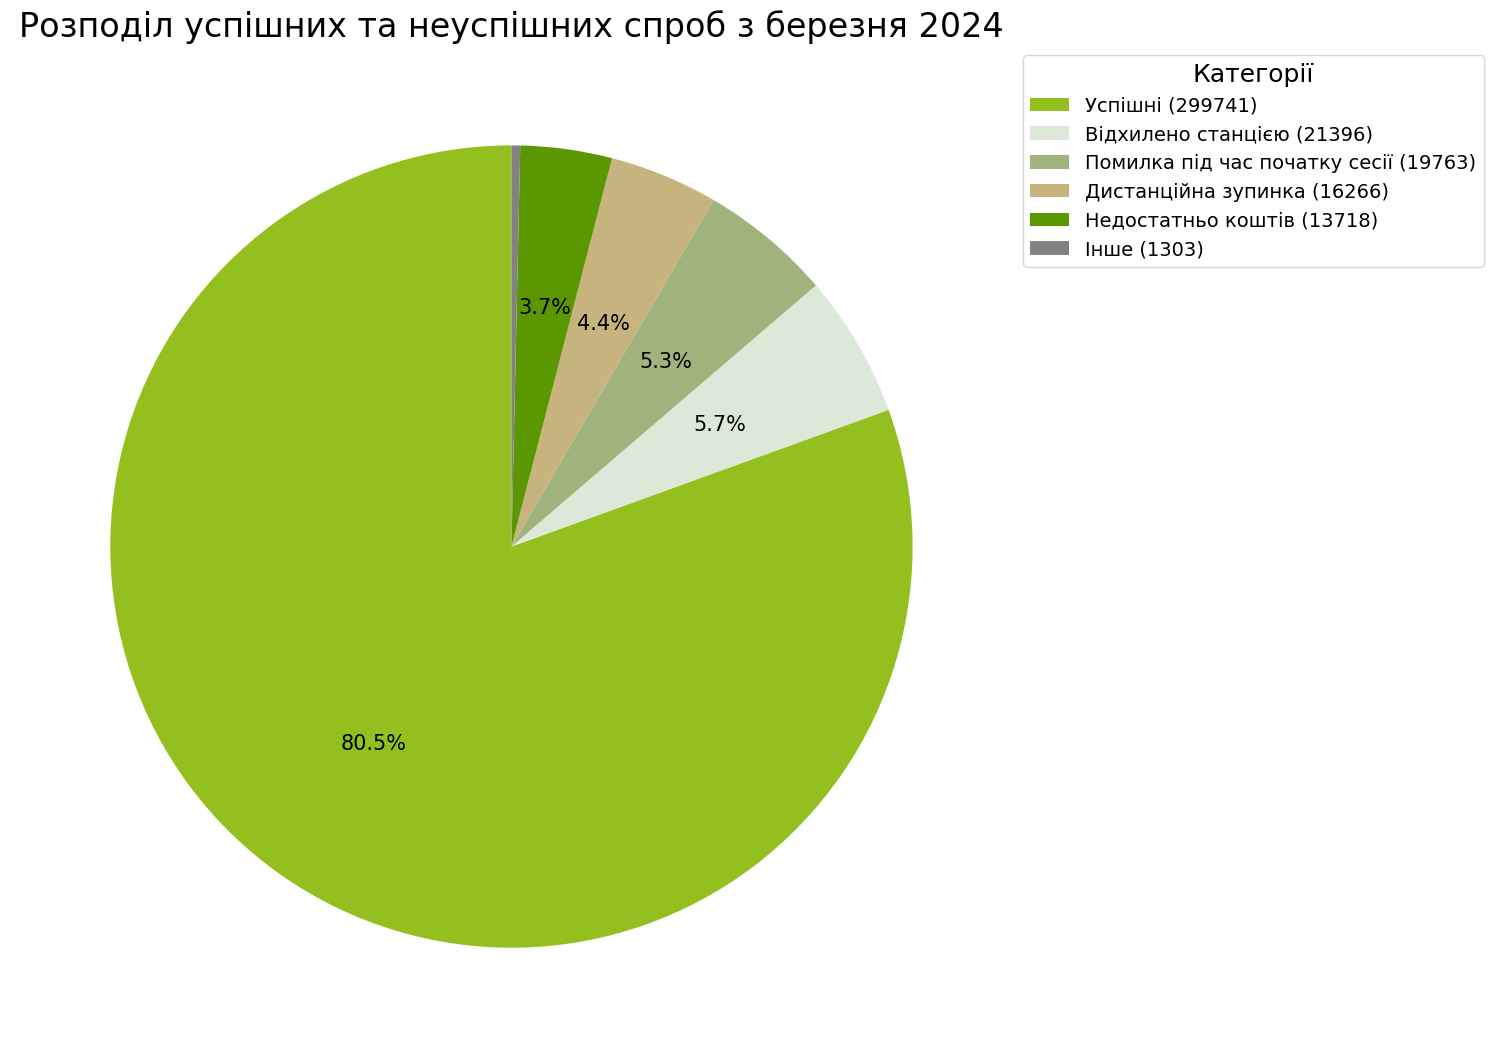

In [101]:
df['DisconnectionReason'] = df['DisconnectionReason'].fillna('Successful')
counts = df['DisconnectionReason'].value_counts()
counts = counts.rename(index={'Successful': 'Успішні'})

top_4_counts = counts.head(5)
other_count = counts[5:].sum()
counts_for_pie = top_4_counts.append(pd.Series({'Інше': other_count}))

def autopct_func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))
    if absolute == other_count:
        return ''  
    return f"{pct:.1f}%"

plt.figure(figsize=(15, 15))
wedges, texts, autotexts = plt.pie(
    counts_for_pie, 
    autopct=lambda pct: autopct_func(pct, counts_for_pie.values), 
    startangle=90, 
    colors=['#94C01F', '#DCE8D8', '#A1B37C', '#C7B37D', '#5B9700', '#828282'],
    labels=[None] * len(counts_for_pie)
)

for autotext in autotexts:
    autotext.set_fontsize(15)

plt.legend(
    wedges, 
    [f"{label} ({value})" for label, value in zip(counts_for_pie.index, counts_for_pie.values)], 
    title="Категорії", 
    title_fontsize=18,
    loc="upper left", 
    bbox_to_anchor=(1, 0, 0.5, 1), 
    fontsize=14
)


plt.title('Розподіл успішних та неуспішних спроб з березня 2024', fontsize=24)

plt.tight_layout()
plt.show()


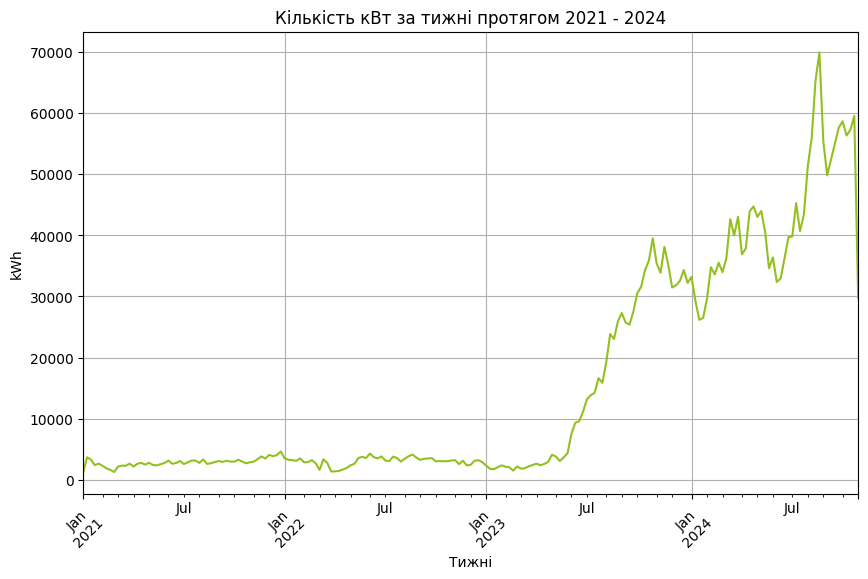

In [102]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Date'] = df['Start'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

weekly_kWh = df.resample('W', on='Date')['kWh'].sum()

plt.figure(figsize=(10, 6))
weekly_kWh.plot(kind='line', color='#94C01F')
plt.title('Кількість кВт за тижні протягом 2021 - 2024')
plt.xlabel('Тижні')
plt.ylabel('kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

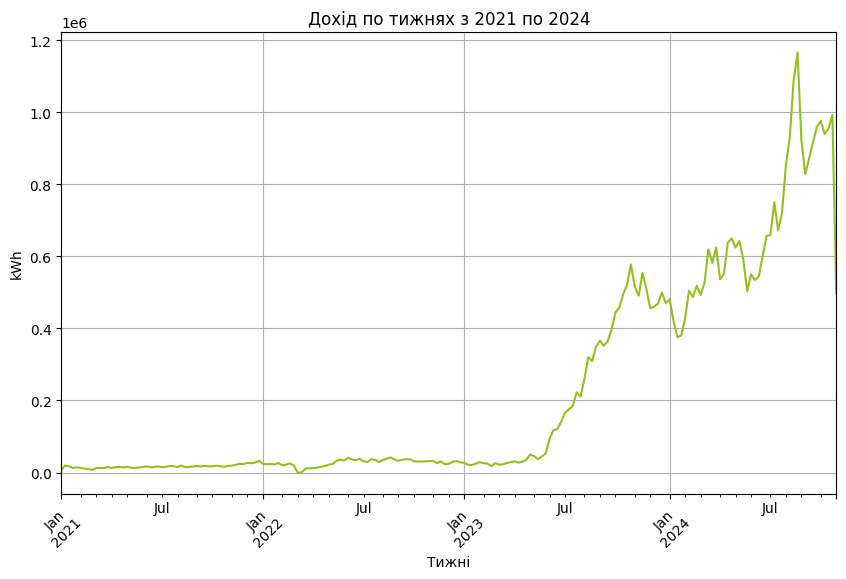

In [103]:
df['Revenue'] = df['Revenue'].replace({'\xa0': '', ',': '.'}, regex=True)
df['Revenue'] = df['Revenue'].astype(float)
weekly_revenue = df.resample('W', on='Date')['Revenue'].sum()
plt.figure(figsize=(10, 6))
weekly_revenue.plot(kind='line', color='#94C01F')
plt.title('Дохід по тижнях з 2021 по 2024')
plt.xlabel('Тижні')
plt.ylabel('kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()